In [42]:
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras import Sequential
from keras.models import Sequential
from keras.optimizers import SGD,Adam,Adagrad
from keras.layers import InputLayer, Dense 
%matplotlib inline
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler


In [43]:
pwd

'C:\\Users\\user\\Desktop\\python\\zero_to_deep_learning_video-master'

In [44]:
df=pd.read_csv('C:\\Users\\user\\Desktop\\python\\zero_to_deep_learning_video-master\\data\\diabetes.csv')

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CCD441D08>,
      dtype=object)

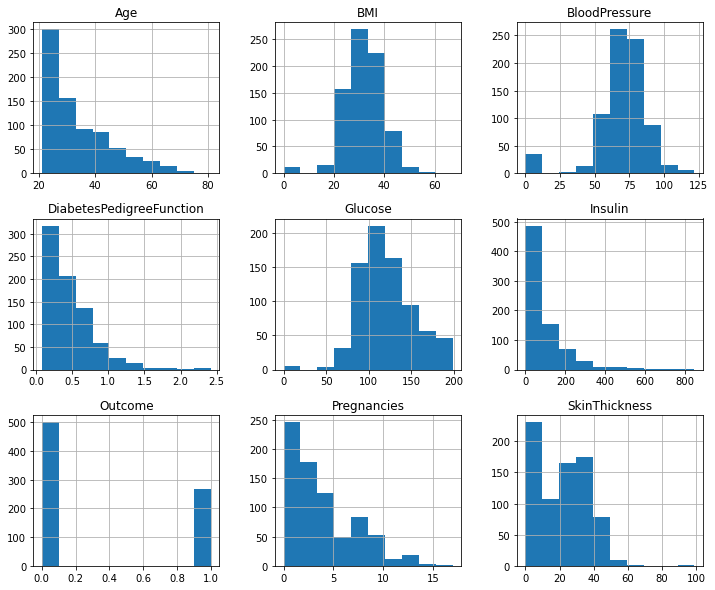

In [47]:
#Plotting the variables using histogram
df.hist(figsize=(12,10))

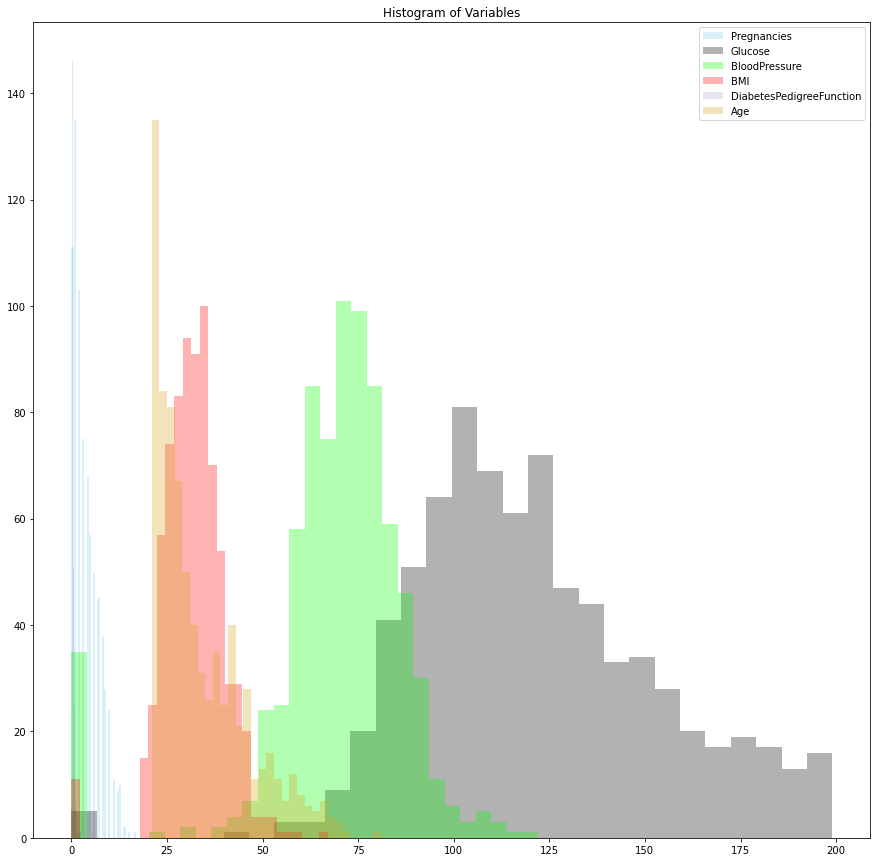

In [48]:
fig,ax=plt.subplots(figsize=(15,15))

plt.hist(df['Pregnancies'],color='skyblue',bins=30,alpha=0.3)
plt.hist(df['Glucose'],color='black',bins=30,alpha=0.3)
plt.hist(df['BloodPressure'],color='lime',bins=30,alpha=0.3)
plt.hist(df['BMI'],color='red',bins=30,alpha=0.3)
plt.hist(df['DiabetesPedigreeFunction'],color='navy',bins=30,alpha=0.1)
plt.hist(df['Age'],color='goldenrod',bins=30,alpha=0.3)

plt.title('Histogram of Variables')
plt.legend(df[['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']])

In [49]:
#Replacing the zero-values for Blood Pressure
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [50]:
#Replacing the zero-values for BMI
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BMI':0}, np.mean(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.mean(df2['BMI']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [51]:
#Replacing the zero-values for Glucose
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [52]:
#Replacing the zero-values for Insulin
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'Insulin':0}, np.mean(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.mean(df2['Insulin']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [53]:
#Replacing the zero-values for SkinThickness
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [54]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,118.967780,32.439222,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,93.557899,6.880449,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
#Checking for missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

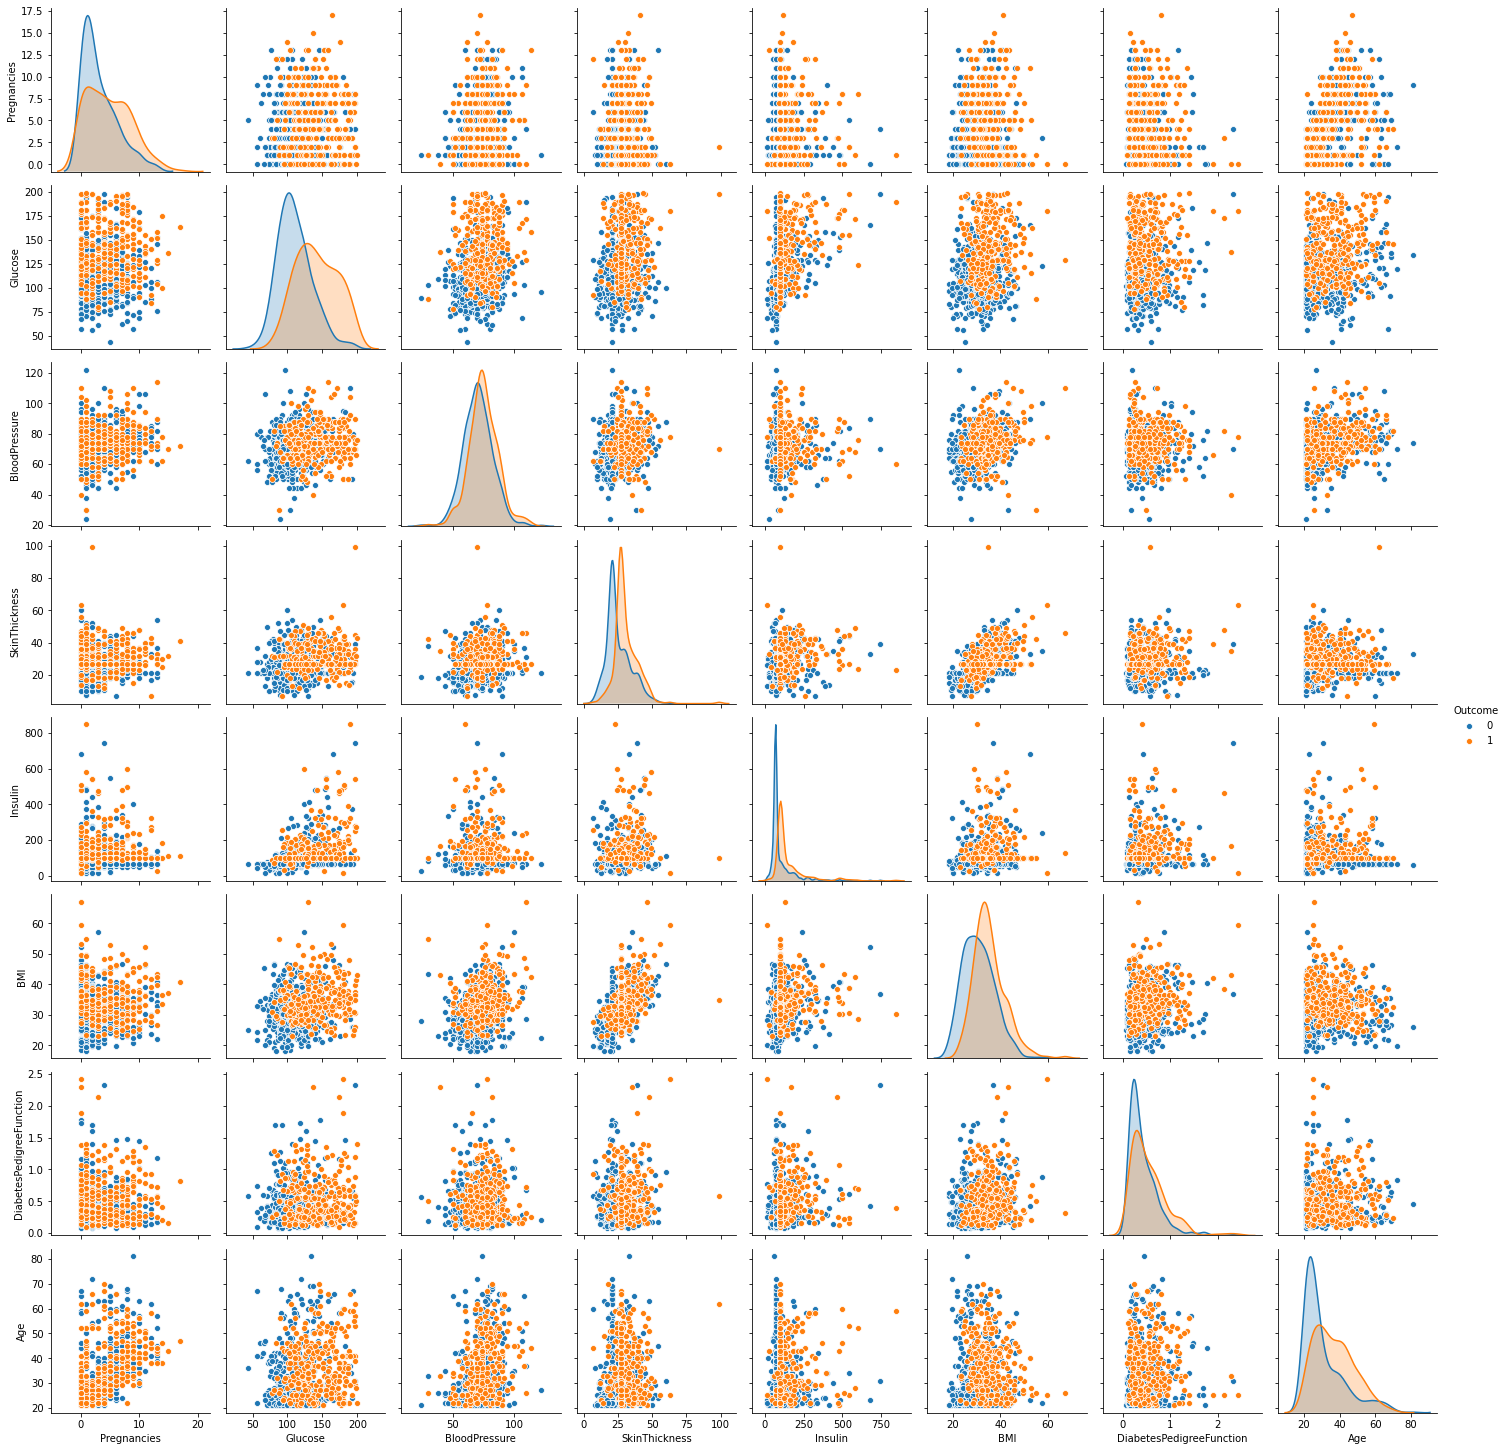

In [56]:
#Checking the correlation between variables
sns.pairplot(df,hue='Outcome')

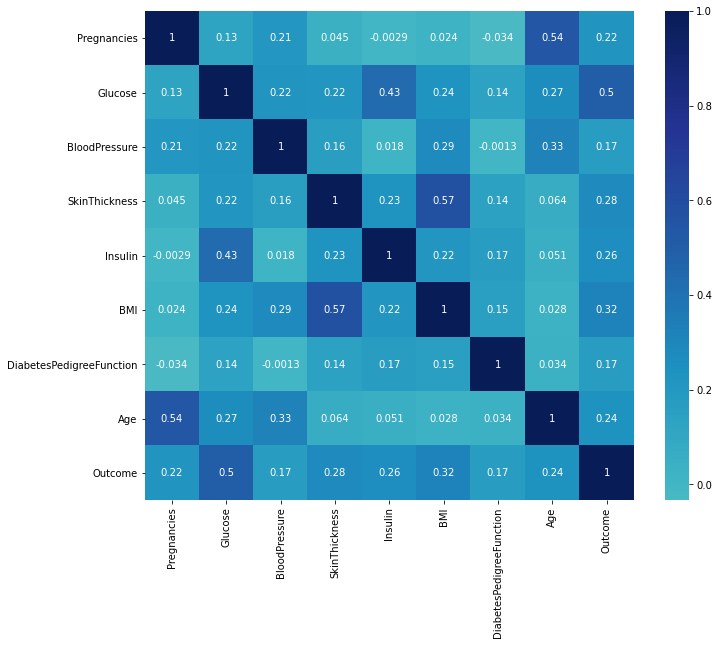

In [57]:
df1=df.corr('pearson')
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df1,center=0,square=True,annot=True,cmap="YlGnBu")

In [58]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,118.967780,32.439222,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,93.557899,6.880449,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
out=[]
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
#Splitting data into data and target
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,100.335821,33.6,0.627,50
2,8,183,64,27,100.335821,23.3,0.672,32
4,0,137,40,35,168.000000,43.1,2.288,33
6,3,78,50,32,88.000000,31.0,0.248,26
8,2,197,70,45,543.000000,30.5,0.158,53


In [62]:
#Setting a benchmark
y.value_counts()/len(y)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [63]:
#Converting to category
y=y.astype('category')

In [64]:
#Scaling the X data
columns = X.columns
scale=StandardScaler()
X=scale.fit_transform(X)
X

array([[ 0.63994726,  0.86462486, -0.0313235 , ...,  0.16881659,
         0.46849198,  1.4259954 ],
       [ 1.23388019,  2.01426457, -0.69266918, ..., -1.32915431,
         0.60439732, -0.10558415],
       [-1.14185152,  0.50330953, -2.67670622, ...,  1.55044024,
         5.4849091 , -0.0204964 ],
       ...,
       [-0.54791859,  0.01060679, -0.19665992, ...,  0.63420561,
        -0.39828208, -0.53102292],
       [ 0.3429808 , -0.02224005, -0.0313235 , ..., -0.90739551,
        -0.68519336, -0.27575966],
       [-0.84488505, -0.94195182, -0.19665992, ..., -0.29657242,
        -0.47378505, -0.87137393]])

In [65]:
X=pd.DataFrame(X, columns = columns)

In [66]:
#Splitting the data between Train and Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)
X.shape

(768, 8)

In [67]:
X.describe

<bound method NDFrame.describe of      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.864625      -0.031324       0.812528 -0.199279  0.168817   
1       1.233880  2.014265      -0.692669      -0.046266 -0.199279 -1.329154   
2      -1.141852  0.503310      -2.676706       0.812528  0.524426  1.550440   
3      -0.250952 -1.434655      -1.850024       0.490480 -0.331217 -0.209312   
4      -0.547919  2.474120      -0.196660       1.886020  4.535251 -0.282029   
..           ...       ...            ...            ...       ...       ...   
763     1.530847 -1.073339      -0.858006      -0.690362 -0.536657 -1.445502   
764     1.827813 -0.679177       0.299349       2.208068  0.652772  0.067013   
765    -0.547919  0.010607      -0.196660      -0.046266 -0.536657  0.634206   
766     0.342981 -0.022240      -0.031324      -0.475663 -0.074524 -0.907396   
767    -0.844885 -0.941952      -0.196660       0.383131 -0.536657 -0.296572   

     

In [68]:
from keras.layers import Dropout
#Model Creation
model=Sequential()
model.add(Dense(64,input_shape=(8,),activation='softmax'))
model.add(Dense(32,activation='softmax'))
model.add(Dense(16,activation='softmax'))
model.add(Dense(8,activation='softmax'))
model.add(Dense(4,activation='sigmoid'))
#model.add(Dense(2,activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(Adagrad(lr=0.05),'binary_crossentropy',metrics=['accuracy'])

history=model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs = 100)


print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test,y_test))

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 1s 2ms/step - loss: 0.6484 - accuracy: 0.6547 - val_loss: 0.6585 - val_accuracy: 0.6364
Epoch 2/100
614/614 [==============================] - 0s 397us/step - loss: 0.6456 - accuracy: 0.6547 - val_loss: 0.6586 - val_accuracy: 0.6364
Epoch 3/100
614/614 [==============================] - 0s 371us/step - loss: 0.6452 - accuracy: 0.6547 - val_loss: 0.6554 - val_accuracy: 0.6364
Epoch 4/100
614/614 [==============================] - 0s 508us/step - loss: 0.6429 - accuracy: 0.6547 - val_loss: 0.6536 - val_accuracy: 0.6364
Epoch 5/100
614/614 [==============================] - 0s 508us/step - loss: 0.6379 - accuracy: 0.6547 - val_loss: 0.6455 - val_accuracy: 0.6364
Epoch 6/100
614/614 [==============================] - 0s 295us/step - loss: 0.6266 - accuracy: 0.6547 - val_loss: 0.6312 - val_accuracy: 0.6364
Epoch 7/100
614/614 [==============================] - 0s 410us/step - loss: 0.6091 - 

Epoch 57/100
614/614 [==============================] - 0s 280us/step - loss: 0.3692 - accuracy: 0.8583 - val_loss: 0.4124 - val_accuracy: 0.8247
Epoch 58/100
614/614 [==============================] - 0s 247us/step - loss: 0.3690 - accuracy: 0.8583 - val_loss: 0.4130 - val_accuracy: 0.8117
Epoch 59/100
614/614 [==============================] - 0s 371us/step - loss: 0.3688 - accuracy: 0.8583 - val_loss: 0.4131 - val_accuracy: 0.8182
Epoch 60/100
614/614 [==============================] - 0s 436us/step - loss: 0.3686 - accuracy: 0.8583 - val_loss: 0.4135 - val_accuracy: 0.8182
Epoch 61/100
614/614 [==============================] - 0s 287us/step - loss: 0.3684 - accuracy: 0.8583 - val_loss: 0.4131 - val_accuracy: 0.8182
Epoch 62/100
614/614 [==============================] - 0s 280us/step - loss: 0.3681 - accuracy: 0.8583 - val_loss: 0.4132 - val_accuracy: 0.8182
Epoch 63/100
614/614 [==============================] - 0s 352us/step - loss: 0.3680 - accuracy: 0.8583 - val_loss: 0.4134 -

In [69]:
history=pd.DataFrame(history.history)
history.head()

,val_loss,val_accuracy,loss,accuracy
0,0.658483,0.636364,0.648352,0.654723
1,0.658554,0.636364,0.645580,0.654723
2,0.655434,0.636364,0.645212,0.654723
3,0.653578,0.636364,0.642875,0.654723
4,0.645471,0.636364,0.637925,0.654723


In [70]:
y_pred=model.predict_classes(X_test)
score=confusion_matrix(y_test,y_pred)
print('Confusion_matrix \n ', score)
print('acurracy_score:' ,accuracy_score(y_test,y_pred))

Confusion_matrix 
  [[82 16]
 [ 9 47]]
acurracy_score: 0.8376623376623377


In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        98
           1       0.75      0.84      0.79        56

    accuracy                           0.84       154
   macro avg       0.82      0.84      0.83       154
weighted avg       0.84      0.84      0.84       154



In [72]:
#Using KerasClassifier to run our  model

In [73]:
def model_creation(activation='sigmoid',epochs=15):
    model=Sequential()
    model.add(Dense(256,input_shape=(8,),activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(2,activation='sigmoid'))
#model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(Adagrad(lr=0.018),'binary_crossentropy',metrics=['accuracy'])
    return model
model=KerasClassifier(build_fn=model_creation,epochs=200)

model.fit(X_train,y_train)
pred=model.predict(X_test)
print(classification_report(y_test,pred))


Epoch 1/200
614/614 [==============================] - 1s 1ms/step - loss: 0.6147 - accuracy: 0.6889
Epoch 2/200
614/614 [==============================] - 0s 652us/step - loss: 0.5684 - accuracy: 0.7850
Epoch 3/200
614/614 [==============================] - 0s 521us/step - loss: 0.5528 - accuracy: 0.7818
Epoch 4/200
614/614 [==============================] - 0s 671us/step - loss: 0.5392 - accuracy: 0.78660s - loss: 0.5462 - accuracy
Epoch 5/200
614/614 [==============================] - 0s 534us/step - loss: 0.5284 - accuracy: 0.7964
Epoch 6/200
614/614 [==============================] - 0s 501us/step - loss: 0.5156 - accuracy: 0.8176
Epoch 7/200
614/614 [==============================] - 0s 612us/step - loss: 0.5111 - accuracy: 0.8208
Epoch 8/200
614/614 [==============================] - 0s 534us/step - loss: 0.5007 - accuracy: 0.8274
Epoch 9/200
614/614 [==============================] - 0s 573us/step - loss: 0.4957 - accuracy: 0.8274
Epoch 10/200
614/614 [=========================

614/614 [==============================] - 0s 488us/step - loss: 0.3161 - accuracy: 0.91530s - loss: 0.3090 - accuracy: 
Epoch 79/200
614/614 [==============================] - 0s 456us/step - loss: 0.3155 - accuracy: 0.91530s - loss: 0.3290 - accuracy: 0.90 - ETA: 0s - loss: 0.3635 - accuracy: 
Epoch 80/200
614/614 [==============================] - 0s 456us/step - loss: 0.3148 - accuracy: 0.9153
Epoch 81/200
614/614 [==============================] - 0s 573us/step - loss: 0.3220 - accuracy: 0.9104
Epoch 82/200
614/614 [==============================] - 0s 541us/step - loss: 0.3167 - accuracy: 0.91370s - loss: 0.3269 - accuracy: 
Epoch 83/200
614/614 [==============================] - 0s 638us/step - loss: 0.3218 - accuracy: 0.9088
Epoch 84/200
614/614 [==============================] - 0s 495us/step - loss: 0.3265 - accuracy: 0.9039
Epoch 85/200
614/614 [==============================] - 0s 495us/step - loss: 0.3321 - accuracy: 0.9023
Epoch 86/200
614/614 [===========================

614/614 [==============================] - 0s 534us/step - loss: 0.2895 - accuracy: 0.9169
Epoch 154/200
614/614 [==============================] - 0s 482us/step - loss: 0.2893 - accuracy: 0.9169
Epoch 155/200
614/614 [==============================] - 0s 475us/step - loss: 0.2891 - accuracy: 0.9169
Epoch 156/200
614/614 [==============================] - 0s 482us/step - loss: 0.2890 - accuracy: 0.9169
Epoch 157/200
614/614 [==============================] - 0s 599us/step - loss: 0.2888 - accuracy: 0.9169
Epoch 158/200
614/614 [==============================] - 0s 482us/step - loss: 0.2886 - accuracy: 0.9169
Epoch 159/200
614/614 [==============================] - 0s 456us/step - loss: 0.2884 - accuracy: 0.9169
Epoch 160/200
614/614 [==============================] - 0s 528us/step - loss: 0.2882 - accuracy: 0.9169
Epoch 161/200
614/614 [==============================] - 1s 1ms/step - loss: 0.2881 - accuracy: 0.9169
Epoch 162/200
614/614 [==============================] - 1s 1ms/step - 

In [ ]:
#Cross vaidation on the model
cv=KFold(n_splits=5,shuffle=True)
scores=cross_val_score(model,X,y,cv=cv,verbose=0)

Epoch 1/200
614/614 [==============================] - 1s 2ms/step - loss: 0.6003 - accuracy: 0.7052
Epoch 2/200
614/614 [==============================] - 0s 699us/step - loss: 0.5369 - accuracy: 0.7769
Epoch 3/200
614/614 [==============================] - 0s 788us/step - loss: 0.5184 - accuracy: 0.7948
Epoch 4/200
614/614 [==============================] - 1s 944us/step - loss: 0.5048 - accuracy: 0.7980
Epoch 5/200
614/614 [==============================] - 0s 651us/step - loss: 0.4849 - accuracy: 0.8225
Epoch 6/200
614/614 [==============================] - 0s 501us/step - loss: 0.4713 - accuracy: 0.8339
Epoch 7/200
614/614 [==============================] - 0s 632us/step - loss: 0.4636 - accuracy: 0.8208
Epoch 8/200
614/614 [==============================] - 0s 527us/step - loss: 0.4507 - accuracy: 0.8274
Epoch 9/200
614/614 [==============================] - 0s 632us/step - loss: 0.4420 - accuracy: 0.8453
Epoch 10/200
614/614 [==============================] - 0s 508us/step - los

614/614 [==============================] - 0s 436us/step - loss: 0.2560 - accuracy: 0.9381
Epoch 77/200
614/614 [==============================] - 0s 625us/step - loss: 0.2554 - accuracy: 0.9381
Epoch 78/200
614/614 [==============================] - 0s 580us/step - loss: 0.2550 - accuracy: 0.9381
Epoch 79/200
614/614 [==============================] - 0s 606us/step - loss: 0.2544 - accuracy: 0.9381
Epoch 80/200
614/614 [==============================] - 0s 495us/step - loss: 0.2539 - accuracy: 0.9381
Epoch 81/200
614/614 [==============================] - 0s 625us/step - loss: 0.2531 - accuracy: 0.9381
Epoch 82/200
614/614 [==============================] - 0s 501us/step - loss: 0.2531 - accuracy: 0.9381
Epoch 83/200
614/614 [==============================] - 0s 648us/step - loss: 0.2522 - accuracy: 0.9381
Epoch 84/200
614/614 [==============================] - 0s 534us/step - loss: 0.2517 - accuracy: 0.9381
Epoch 85/200
614/614 [==============================] - 0s 534us/step - loss:

614/614 [==============================] - 0s 456us/step - loss: 0.2332 - accuracy: 0.9397
Epoch 153/200
614/614 [==============================] - 0s 677us/step - loss: 0.2331 - accuracy: 0.9397
Epoch 154/200
614/614 [==============================] - 0s 475us/step - loss: 0.2329 - accuracy: 0.9397
Epoch 155/200
614/614 [==============================] - 0s 449us/step - loss: 0.2328 - accuracy: 0.9397
Epoch 156/200
614/614 [==============================] - 0s 599us/step - loss: 0.2326 - accuracy: 0.9397
Epoch 157/200
614/614 [==============================] - 0s 527us/step - loss: 0.2325 - accuracy: 0.93970s - loss: 0.2162 - accuracy: 0.94
Epoch 158/200
614/614 [==============================] - 0s 462us/step - loss: 0.2324 - accuracy: 0.9397
Epoch 159/200
614/614 [==============================] - 0s 567us/step - loss: 0.2323 - accuracy: 0.9397
Epoch 160/200
614/614 [==============================] - 0s 632us/step - loss: 0.2321 - accuracy: 0.93970s - loss: 0.2420 - accuracy: 
Epoch

614/614 [==============================] - 0s 571us/step - loss: 0.3569 - accuracy: 0.8876
Epoch 28/200
614/614 [==============================] - ETA: 0s - loss: 0.3623 - accuracy: 0.88 - 0s 632us/step - loss: 0.3564 - accuracy: 0.8909
Epoch 29/200
614/614 [==============================] - 0s 514us/step - loss: 0.3553 - accuracy: 0.8909
Epoch 30/200
614/614 [==============================] - 0s 606us/step - loss: 0.3500 - accuracy: 0.8941
Epoch 31/200
614/614 [==============================] - 0s 482us/step - loss: 0.3486 - accuracy: 0.8893
Epoch 32/200
614/614 [==============================] - 0s 586us/step - loss: 0.3409 - accuracy: 0.9007
Epoch 33/200
614/614 [==============================] - 0s 514us/step - loss: 0.3377 - accuracy: 0.8990
Epoch 34/200
614/614 [==============================] - 0s 541us/step - loss: 0.3342 - accuracy: 0.9007
Epoch 35/200
614/614 [==============================] - 0s 456us/step - loss: 0.3300 - accuracy: 0.9039
Epoch 36/200
614/614 [=============

614/614 [==============================] - 0s 534us/step - loss: 0.2734 - accuracy: 0.9202
Epoch 103/200
614/614 [==============================] - 0s 554us/step - loss: 0.2731 - accuracy: 0.9202
Epoch 104/200
614/614 [==============================] - 0s 781us/step - loss: 0.2729 - accuracy: 0.9202
Epoch 105/200
614/614 [==============================] - 0s 567us/step - loss: 0.2726 - accuracy: 0.9202
Epoch 106/200
614/614 [==============================] - 0s 716us/step - loss: 0.2723 - accuracy: 0.9202
Epoch 107/200
614/614 [==============================] - 0s 554us/step - loss: 0.2721 - accuracy: 0.9202
Epoch 108/200
614/614 [==============================] - 0s 502us/step - loss: 0.2718 - accuracy: 0.9202
Epoch 109/200
614/614 [==============================] - 0s 536us/step - loss: 0.2715 - accuracy: 0.9202
Epoch 110/200
614/614 [==============================] - 0s 462us/step - loss: 0.2713 - accuracy: 0.9202
Epoch 111/200
614/614 [==============================] - 0s 443us/ste

614/614 [==============================] - ETA: 0s - loss: 0.2622 - accuracy: 0.91 - 0s 814us/step - loss: 0.2608 - accuracy: 0.9202
Epoch 179/200
614/614 [==============================] - 1s 925us/step - loss: 0.2607 - accuracy: 0.9202
Epoch 180/200
614/614 [==============================] - 0s 658us/step - loss: 0.2606 - accuracy: 0.9202
Epoch 181/200
614/614 [==============================] - 0s 593us/step - loss: 0.2605 - accuracy: 0.9202
Epoch 182/200
614/614 [==============================] - 0s 612us/step - loss: 0.2604 - accuracy: 0.9202
Epoch 183/200
614/614 [==============================] - 0s 625us/step - loss: 0.2603 - accuracy: 0.9202
Epoch 184/200
614/614 [==============================] - 0s 684us/step - loss: 0.2602 - accuracy: 0.9202
Epoch 185/200
614/614 [==============================] - 0s 586us/step - loss: 0.2602 - accuracy: 0.9202
Epoch 186/200
614/614 [==============================] - 0s 495us/step - loss: 0.2601 - accuracy: 0.9202
Epoch 187/200
614/614 [====

614/614 [==============================] - 0s 755us/step - loss: 0.3311 - accuracy: 0.9039
Epoch 54/200
614/614 [==============================] - 1s 918us/step - loss: 0.3266 - accuracy: 0.9121
Epoch 55/200
614/614 [==============================] - 0s 801us/step - loss: 0.3207 - accuracy: 0.9137
Epoch 56/200
614/614 [==============================] - 0s 677us/step - loss: 0.3166 - accuracy: 0.9169
Epoch 57/200
614/614 [==============================] - 0s 775us/step - loss: 0.3157 - accuracy: 0.9169
Epoch 58/200
614/614 [==============================] - 0s 651us/step - loss: 0.3149 - accuracy: 0.9169
Epoch 59/200
614/614 [==============================] - 1s 866us/step - loss: 0.3142 - accuracy: 0.9169
Epoch 60/200
614/614 [==============================] - 0s 716us/step - loss: 0.3134 - accuracy: 0.9169
Epoch 61/200
614/614 [==============================] - 1s 892us/step - loss: 0.3127 - accuracy: 0.9169
Epoch 62/200
614/614 [==============================] - 1s 964us/step - loss:

614/614 [==============================] - 0s 645us/step - loss: 0.2799 - accuracy: 0.9202
Epoch 129/200
614/614 [==============================] - 0s 716us/step - loss: 0.2796 - accuracy: 0.9202
Epoch 130/200
614/614 [==============================] - 1s 860us/step - loss: 0.2794 - accuracy: 0.9202
Epoch 131/200
614/614 [==============================] - 0s 495us/step - loss: 0.2792 - accuracy: 0.9202
Epoch 132/200
614/614 [==============================] - 0s 606us/step - loss: 0.2789 - accuracy: 0.9202
Epoch 133/200
614/614 [==============================] - 0s 736us/step - loss: 0.2787 - accuracy: 0.9202
Epoch 134/200
614/614 [==============================] - 0s 710us/step - loss: 0.2784 - accuracy: 0.9202
Epoch 135/200
614/614 [==============================] - 0s 788us/step - loss: 0.2782 - accuracy: 0.9202
Epoch 136/200
614/614 [==============================] - 0s 723us/step - loss: 0.2780 - accuracy: 0.9202
Epoch 137/200
614/614 [==============================] - 0s 606us/ste

615/615 [==============================] - 0s 481us/step - loss: 0.4935 - accuracy: 0.8000
Epoch 5/200
615/615 [==============================] - 0s 462us/step - loss: 0.4854 - accuracy: 0.8114
Epoch 6/200
615/615 [==============================] - 0s 546us/step - loss: 0.4641 - accuracy: 0.8276
Epoch 7/200
615/615 [==============================] - 0s 566us/step - loss: 0.4532 - accuracy: 0.8341
Epoch 8/200
615/615 [==============================] - 0s 546us/step - loss: 0.4376 - accuracy: 0.8537
Epoch 9/200
615/615 [==============================] - 0s 449us/step - loss: 0.4384 - accuracy: 0.8618
Epoch 10/200
615/615 [==============================] - 0s 429us/step - loss: 0.4233 - accuracy: 0.8732
Epoch 11/200
615/615 [==============================] - 0s 436us/step - loss: 0.4186 - accuracy: 0.8764
Epoch 12/200
615/615 [==============================] - 0s 488us/step - loss: 0.4182 - accuracy: 0.8732
Epoch 13/200
615/615 [==============================] - 0s 585us/step - loss: 0.40

C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.147946). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


615/615 [==============================] - 1s 1ms/step - loss: 0.3117 - accuracy: 0.9138
Epoch 65/200
615/615 [==============================] - 0s 652us/step - loss: 0.3112 - accuracy: 0.9138
Epoch 66/200
615/615 [==============================] - 0s 514us/step - loss: 0.3106 - accuracy: 0.9138
Epoch 67/200
615/615 [==============================] - 0s 501us/step - loss: 0.3101 - accuracy: 0.9138
Epoch 68/200
615/615 [==============================] - 0s 579us/step - loss: 0.3095 - accuracy: 0.9138
Epoch 69/200
615/615 [==============================] - 0s 585us/step - loss: 0.3089 - accuracy: 0.9138
Epoch 70/200
615/615 [==============================] - 0s 468us/step - loss: 0.3084 - accuracy: 0.9138
Epoch 71/200
615/615 [==============================] - 0s 488us/step - loss: 0.3079 - accuracy: 0.9138
Epoch 72/200
615/615 [==============================] - 0s 585us/step - loss: 0.3073 - accuracy: 0.9138
Epoch 73/200
615/615 [==============================] - 0s 579us/step - loss: 0

615/615 [==============================] - 0s 533us/step - loss: 0.2867 - accuracy: 0.9138
Epoch 142/200
615/615 [==============================] - 0s 501us/step - loss: 0.2865 - accuracy: 0.91380s - loss: 0.2915 - accuracy: 0.
Epoch 143/200
615/615 [==============================] - 0s 520us/step - loss: 0.2863 - accuracy: 0.9138
Epoch 144/200
615/615 [==============================] - 0s 488us/step - loss: 0.2862 - accuracy: 0.9138
Epoch 145/200
615/615 [==============================] - 0s 533us/step - loss: 0.2860 - accuracy: 0.9138
Epoch 146/200
615/615 [==============================] - 0s 501us/step - loss: 0.2858 - accuracy: 0.91380s - loss: 0.3337 - accuracy
Epoch 147/200
615/615 [==============================] - 0s 455us/step - loss: 0.2857 - accuracy: 0.9138
Epoch 148/200
615/615 [==============================] - 0s 462us/step - loss: 0.2855 - accuracy: 0.9138
Epoch 149/200
615/615 [==============================] - 0s 455us/step - loss: 0.2853 - accuracy: 0.9138
Epoch 150

In [ ]:
scores.mean()

In [ ]:
#0.8242339372634888

In [ ]:
#Comparing Deep Neural Network with others Classifiers

In [ ]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.linear_model import RidgeClassifier as rgc
from sklearn.ensemble import RandomForestClassifier as rfc, AdaBoostClassifier as ada
from sklearn.neural_network import MLPClassifier as MLP

In [86]:
classifiers = [
    knnc(),
    dtc(),
    SVC(kernel='sigmoid'),
    SVC(kernel='sigmoid'),
    rgc(),
    rfc(),
    ada()    
  ]
classifier_names = [
    'KNN',
    'Decision Tree',
    'SVC',
    'SVC with sigmoid kernel',
    'Gaussian Naive Bayes',
    'RidgeClassifier',
    'RandomForrest',
    'Adaboost'
        ]

In [87]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, X,y, cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

KNN  mean accuracy:  78.131 % std:  0.073 %
Decision Tree  mean accuracy:  85.162 % std:  0.031 %
SVC  mean accuracy:  71.224 % std:  0.061 %
SVC with sigmoid kernel  mean accuracy:  71.224 % std:  0.061 %
Gaussian Naive Bayes  mean accuracy:  76.827 % std:  0.062 %
RidgeClassifier  mean accuracy:  88.68 % std:  0.096 %
RandomForrest  mean accuracy:  87.762 % std:  0.005 %


In [88]:
clf=rfc(n_estimators=100)

In [89]:
clf.fit(X_train,y_train)
rfc_pred=clf.predict(X_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        98
           1       0.90      0.84      0.87        56

    accuracy                           0.91       154
   macro avg       0.91      0.89      0.90       154
weighted avg       0.91      0.91      0.91       154



RandomForest is the best classifier with a prediction of 0.90 and KerasClassifier has a prediction score of 0.81.